# Classification based on leaves features

### Importing our own functions


In [13]:
import importlib

import src.Data as Data
importlib.reload(Data)
Data = Data.Data

import src.Metrics as Metrics
importlib.reload(Metrics)
Metrics = Metrics.Metrics


### Importing Libraries

`numpy` and `pandas` are used to manipulate the data

`scikit-learn` is used to train the classification models and compute the metrics

In [14]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import LearningCurveDisplay, learning_curve, cross_validate, train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd

### Choosing the models

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


classifiers = [
    DecisionTreeClassifier(), 
    RandomForestClassifier(n_jobs=-1), 
    #BaggingClassifier(n_jobs=-1), 
    LogisticRegression(n_jobs=-1),
    #SVC(),
    #GaussianNB(),
    #SGDClassifier(n_jobs=-1),
    #KNeighborsClassifier(n_jobs=-1),
    #GradientBoostingClassifier(),
    #MLPClassifier(),
    #AdaBoostClassifier()
    
    ]

### Loading the data
The data is loaded from the `data` folder.

Samples are split into a training set and a test set with a custom ratio. Stratified sampling is used to ensure that the proportion of samples in each class is the same in both sets.

In [16]:
data: Data = Data(test_size=0.2, include_images=False)

least_populated_class_count = np.unique(data.y_train, return_counts=True)[1].min()
print("Least populated class count:", least_populated_class_count)


Least populated class count: 8


### Training the models

#### _Without cross-validation_



We first train the models on the training set without cross-validation.

In [17]:
print('Fit the model without cross-validation or hyperparameter tuning. \n')

metrics_list = []

for classifier in classifiers:
    classifier.fit(data.x_train, data.y_train)
    predictions = classifier.predict(data.x_test)

    classifier_metrics = Metrics(classifier_name=classifier.__class__.__name__)
    # Computing metrics
    classifier_metrics.add_metric('accuracy_score', accuracy_score(data.y_test, predictions))
    classifier_metrics.add_metric('f1_score', f1_score(data.y_test, predictions, average='macro'))
    classifier_metrics.add_metric('precision_score', precision_score(data.y_test, predictions, average='macro'))
    classifier_metrics.add_metric('recall_score', recall_score(data.y_test, predictions, average='macro'))

    metrics_list.append(classifier_metrics)

    Metrics.show_metrics_list(metrics_list)

Fit the model without cross-validation or hyperparameter tuning. 



#### _With cross-validation_
We then train the models on the training set with cross-validation.

The number of folds is chosen to be the number of samples in the least represented class to ensure that each fold contains at least one sample of each class. (This is automatically done by `sklearn.model_selection.StratifiedKFold` used by the function `cross_validate`.)

Fit the model with cross-validation.



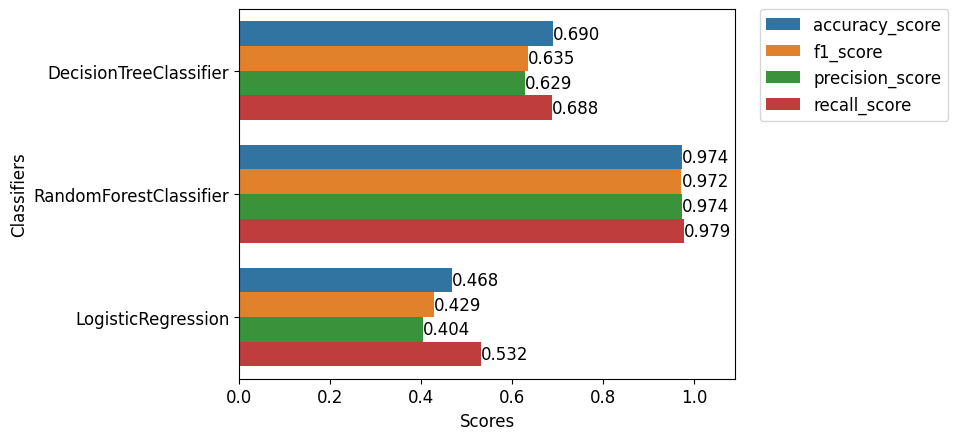

In [ ]:
print('Fit the model with cross-validation.\n')

metrics_list_cv = []

for classifier in classifiers:
    scores = cross_validate(classifier, data.x_tab, data.y_tab, cv=least_populated_class_count, n_jobs=-1, return_train_score=True, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    classifier_metrics = Metrics(classifier_name=classifier.__class__.__name__)
    # Storing metrics
    classifier_metrics.add_metric('accuracy_score', scores['test_accuracy'].mean())
    classifier_metrics.add_metric('f1_score', scores['test_f1_macro'].mean())
    classifier_metrics.add_metric('precision_score', scores['test_precision_macro'].mean())
    classifier_metrics.add_metric('recall_score', scores['test_recall_macro'].mean())

    metrics_list_cv.append(classifier_metrics)

Metrics.show_metrics_list(metrics_list_cv)


#### _With cross-validation and hyperparameter tuning_
We then train the models on the training set with cross-validation and using the best hyperparameters found using the dedicated notebook.

Fit the model with cross-validation and the best hyperparameters.



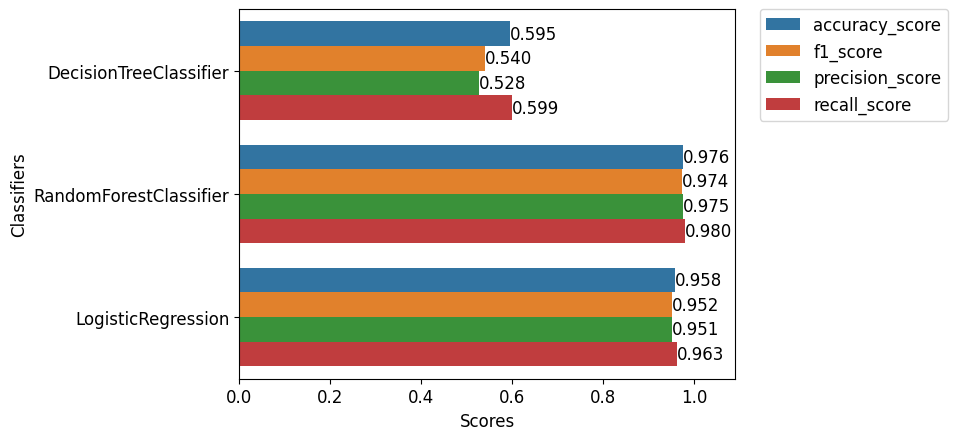

In [ ]:
param_grids = []

selected_classifiers = [classifier.__class__.__name__ for classifier in classifiers]

for i, clf_name in enumerate(selected_classifiers):
    if clf_name == 'DecisionTreeClassifier':
        classifiers[i].set_params(**{
            'criterion': 'gini',
            'max_depth': None,
            'max_features': 'sqrt',
            'min_samples_leaf': 1,
            'min_samples_split': 5,
            'splitter': 'best',
            })
        
    if clf_name == 'RandomForestClassifier':
        classifiers[i].set_params(**{
            'criterion': 'gini',
            'max_features': 'log2',
            'min_samples_split': 2,
            'n_estimators': 500,
            })

    if clf_name == 'BaggingClassifier':
        classifiers[i].set_params(**{
            'bootstrap': False,
            'bootstrap_features': True,
            'max_features': 0.1,
            'max_samples': 0.5,
            'n_estimators': 100,
            })

    if clf_name == 'LogisticRegression':
        classifiers[i].set_params(**{
            'C': 1000,
            'max_iter': 100,
            'penalty': 'l2',
            'solver': 'liblinear',
            })

    if clf_name == 'SVC':
        classifiers[i].set_params(**{
            'C': 50,
            'gamma': 'scale',
            'kernel': 'linear',
            })

    if clf_name == 'GaussianNB':
        classifiers[i].set_params(**{
            'var_smoothing': 0.005,
            })

    if clf_name == 'SGDClassifier':
        classifiers[i].set_params(**{
            'alpha': 0.0001,
            'loss': 'modified_huber',
            'max_iter': 2000,
            'penalty': 'l1',
            })

    if clf_name == 'KNeighborsClassifier':
        classifiers[i].set_params(**{
            'algorithm': 'auto',
            'leaf_size': 1,
            'n_neighbors': 1,
            'p': 1,
            'weights': 'distance',
            })

    if clf_name == 'GradientBoostingClassifier':
        classifiers[i].set_params(**{
            'criterion': 'friedman_mse',
            'learning_rate': 0.025,
            'max_depth': 2,
            'max_features': 'log2',
            'min_samples_split': 10,
            'n_estimators': 500,
            })

    if clf_name == 'MLPClassifier':
        classifiers[i].set_params(**{
            'activation': 'logistic',
            'alpha': 0.01,
            'hidden_layer_sizes': (100,),
            'learning_rate': 'adaptive',
            'max_iter': 500,
            'solver': 'lbfgs',
            })

    if clf_name == 'AdaBoostClassifier':
        classifiers[i].set_params(**{
            'algorithm': 'SAMME.R',
            'learning_rate': 0.01,
            'n_estimators': 500,
            })

print('Fit the model with cross-validation and the best hyperparameters.\n')

metrics_list_cv = []

for classifier in classifiers:
    scores = cross_validate(classifier, data.x_tab, data.y_tab, cv=least_populated_class_count, n_jobs=-1, return_train_score=True, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    classifier_metrics = Metrics(classifier_name=classifier.__class__.__name__)
    # Storing metrics
    classifier_metrics.add_metric('accuracy_score', scores['test_accuracy'].mean())
    classifier_metrics.add_metric('f1_score', scores['test_f1_macro'].mean())
    classifier_metrics.add_metric('precision_score', scores['test_precision_macro'].mean())
    classifier_metrics.add_metric('recall_score', scores['test_recall_macro'].mean())

    metrics_list_cv.append(classifier_metrics)

Metrics.show_metrics_list(metrics_list_cv)

#### _Plotting metrics for each fold_
We plot the metrics for each fold to see if there is a significant difference between the folds.

The printed values are the mean for each metric over all folds.

In [ ]:

for classifier in classifiers:
    print(f'Classifier : {classifier.__class__.__name__}')

    scores = cross_validate(classifier, data.x_tab, data.y_tab, cv=least_populated_class_count, n_jobs=-1, return_train_score=True, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    # Fitting one last time (needed ?)
    # classifier.fit(data.x_train, data.y_train)
    # print(Metrics(classifier, data))

    print(f'\tMean train accuracy : {scores["train_accuracy"].mean()}')
    print(f'\tMean test accuracy : {scores["test_accuracy"].mean()}')
    print(f'\tMean train precision : {scores["train_precision_macro"].mean()}')
    print(f'\tMean test precision : {scores["test_precision_macro"].mean()}')
    print(f'\tMean train recall : {scores["train_recall_macro"].mean()}')
    print(f'\tMean test recall : {scores["test_recall_macro"].mean()}')
    print(f'\tMean train f1 : {scores["train_f1_macro"].mean()}')
    print(f'\tMean test f1 : {scores["test_f1_macro"].mean()}')
    
    # Plotting the metrics for each fold
    plot_cross_validation: bool = True
    if plot_cross_validation:
        # Plot graph of scores
        plt.figure()
        plt.plot(scores['train_accuracy'], label='train accuracy')
        plt.plot(scores['test_accuracy'], label='test accuracy')
        # plt.plot(scores['train_precision_macro'], label='train precision')
        # plt.plot(scores['test_precision_macro'], label='test precision')
        # plt.plot(scores['train_recall_macro'], label='train recall')
        # plt.plot(scores['test_recall_macro'], label='test recall')
        # plt.plot(scores['train_f1_macro'], label='train f1')
        # plt.plot(scores['test_f1_macro'], label='test f1')
        plt.xlabel('Fold')
        plt.ylabel('Score')
        plt.legend()
        plt.show()
    
    print('\n')